In [93]:
import numpy as np
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
import math
import scipy.stats

# Erdős-Rényi Networks

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10^(-3)

1.

What is the expected number of links?

In [53]:
P = 10**(-3)
N = 3000
EXPECTED_LINK_NUMBER = P*N*(N-1)*0.5
EXPECTED_LINK_NUMBER

4498.5

In [58]:
# TEST IT:
L = 0
for i in range(4498500):  #(N(N-1)/2)
    x = random.random()
    if x < 10**(-3):
        L = L + 1

print(L)

# Almost same

4571


2.

In which regime is the network?

In [60]:
P = 10**(-3)
N = 3000
Average_K = P*(N-1)
Average_K

2.999

In [61]:
# Because Average_K > 1 , so it is in the Supercritical Regime.

3.

Calculate the probability P_c so that the network is at the critical point

In [63]:
# We need to let p = 1/N
P_c = 1/3000
P_c

0.0003333333333333333

In [64]:
# P_c = 0.0003333333333333333

4.

Given the linking probability p = 10**(–3), calculate the number of nodes Ncr so that the network has only one component.

In [78]:
#According to the formula 3.41: p = ln N/ N
#We use wolframalpha to calculate, N1 = 1.001, N2 = 9118.01
#We can draw a simple graph about this equation:
# Np = ln N, namely 0.001*N = ln N, 
# the solution is the intersection of a linear equation function and a logarithmic function.
# So we can find 2 solutions, one is extremely close to N=1, the other is calculated as 9118

N_CR = 9118
N_CR

9118

5.

For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.

In [86]:
P = 0.001
N = 9118
Average_KCR = P*(N-1)
Average_KCR

9.117

In [87]:
# Average distance = ln N / ln <K>
Average_Disdance = np.log(N)/np.log(Average_KCR)
Average_Disdance

4.125531617730235

6.

Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

In [92]:
# The probability that the degree of the node is k:  p**k
# The probability that the remaining (N-1-k) links are missing: (1-p)**(N-1-k) 
# The number of ways we can select k links from N- 1 potential links a node can have: C (k,N-1)


# So, pk = math.exp(-Average_KCR)*Average_KCR**k/math.factorial(k)
# For example, we try k = 3
k=3
pk = math.exp(-Average_KCR)*Average_KCR**k/math.factorial(k)
print('when k = 3, pk=',pk)

when k = 3, pk= 0.013865700733935013


d:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

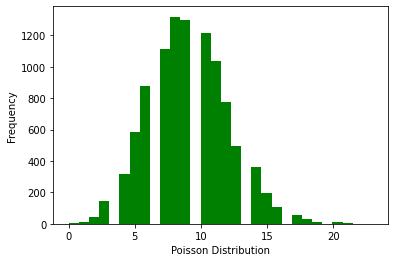

In [95]:
# Make a graph about the degree distribution
from scipy.stats import poisson
import seaborn as sns
data_poisson = poisson.rvs(mu=Average_KCR, size=10000)
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color="green",
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

# Generating Erdős-Rényi Networks

Relying on the G(N, p) model, generate with a computer three networks with N = 500 nodes and average degree (a) 〈k〉 = 0.8, (b) 〈k〉 = 1 and (c) 〈k〉 = 8. Visualize these networks.

In [128]:
#<k> = p(N-1), p = <k>/(N-1)
p1 = 0.8/499
p2 = 1/499
p3 = 8/499


In [129]:
def get_ER_graph(n,p):
    G = nx.Graph() # creat an empty graph
    G.add_nodes_from([i for i in range(n)]) # add the nodes
    # Next we add the edges:
    for i in G.nodes(): # traverse all the connections
        for j in G.nodes():
            if i != j:
                x = random.random()
                if x <= p:
                    G.add_edge(i,j)
                else:
                    continue
    nx.draw(G)
    plt.show()

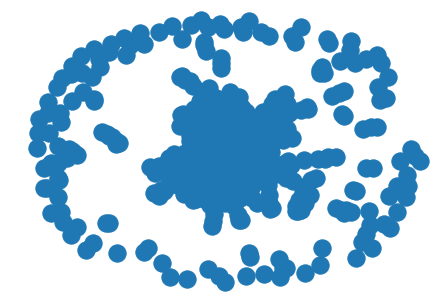

In [130]:
get_ER_graph(500,p1)

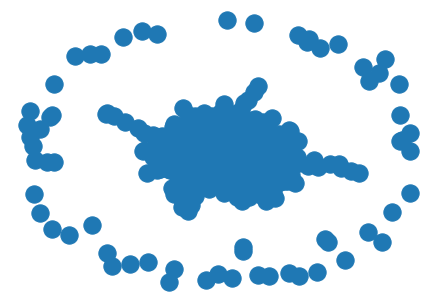

In [131]:
get_ER_graph(500,p2)

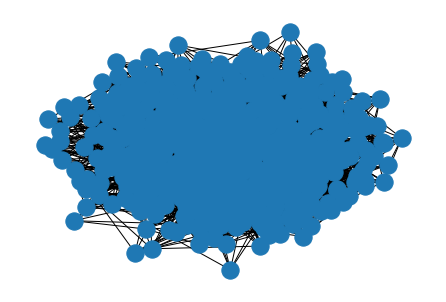

In [132]:
get_ER_graph(500,p3)

# Circle Network

Consider a network with N nodes placed on a circle, so that each node connects to m neighbors on either side (consequently each node has degree 2m). Image 3.14(a) shows an example of such a network with m = 2 and N = 20. Calculate the average clustering coefficient 〈C〉 of this network and the average shortest path 〈d〉. For simplicity assume that N and m are chosen such that (n-1)/2m is an integer. What happens to 〈C〉 if N≫1? And what happens to 〈d〉?

In [141]:
# We can find that all the nodes' degree are eaual. So we can calculate the average clustering coefficient by using one specific node.
# So the value = 2*3/[(2*2)*(2*2-1)] = 1/2
# Genernally, according to https://sites.pitt.edu/~kpele/Materials15/module8.pdf

#average_clustering_coefficient = 3*(2m-2)/((4*2m-1))
average_clustering_coefficient

0.5

In [142]:
# When 2m = Positive infinity: average_clustering_coefficient = 0.75
# When m = 1 : average_clustering_coefficient = 0

# Cayley Tree

A Cayley tree is a symmetric tree, constructed starting from a central node of degree k. Each node at distance d from the central node has degree k, until we reach the nodes at distance P that have degree one and are called leaves (see Image 3.16 for a Cayley tree with k = 3 and P = 5.)

1.

Calculate the number of nodes reachable in t steps from the central node.

# Paths
Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

In [202]:
G = nx.Graph()
# <k> = 1.5 = p*(N-1)
# p = 1.5/(N-1)
N = 200
p = 1.5/(200-1)
N,p

(200, 0.007537688442211055)

In [203]:
# I do not know whether this function is right
def get_ER_graph(n,p):
    G = nx.Graph() # creat an empty graph
    G.add_nodes_from([i for i in range(n)]) # add the nodes
    # Next we add the edges:
    for i in G.nodes(): # traverse all the connections
        for j in G.nodes():
            if i != j:
                x = random.random()
                if x <= p:
                    G.add_edge(i,j)
                else:
                    continue
    return G

In [204]:
ER = get_ER_graph(200,p)

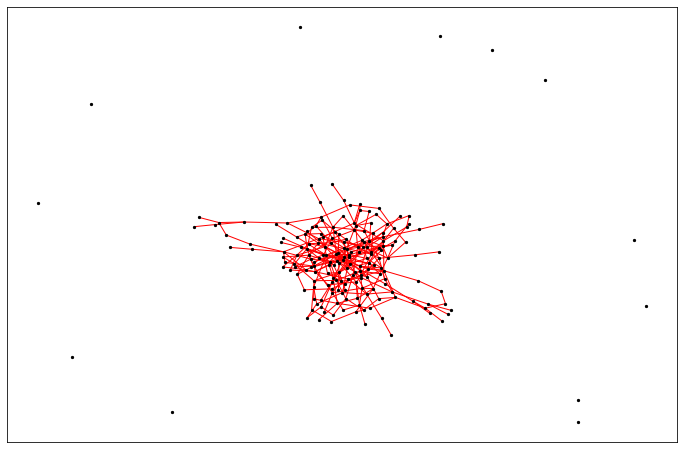

In [205]:
#nx.draw_networkx(G,[ pos, arrows, with_labels])

#pos = [nx.circular_layout(ER)]
pos = [nx.spring_layout(ER)]
options = {
    "node_color": 'black',
    "node_size": 5,
    "edge_color": 'r',
    "with_labels": False,
}
plt.figure(figsize=(12,8))
nx.draw_networkx(ER,pos[0], **options)
plt.show()

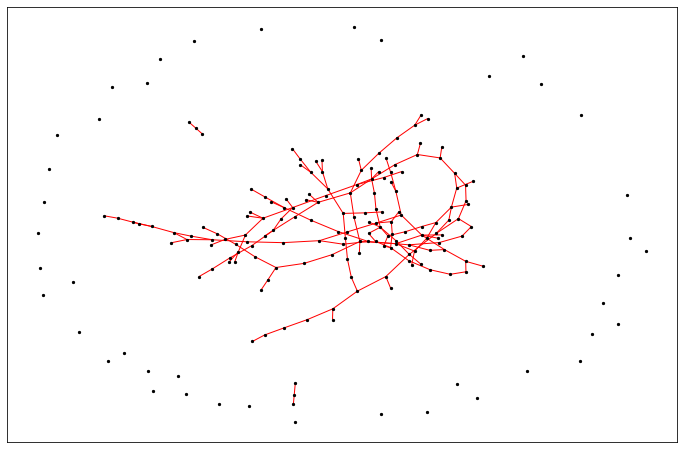

In [206]:
# Let's use the official library: nx.erdos_renyi_graph(n, p, seed=None, directed=False)
n = 200
k = 1.5
p = k / (n - 1)
ER2 = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

pos = [nx.spring_layout(ER2)]
options = {
    "node_color": 'black',
    "node_size": 5,
    "edge_color": 'r',
    "with_labels": False,
}
plt.figure(figsize=(12,8))
nx.draw_networkx(ER2,pos[0], **options)
# nx.draw(er_g, pos=nx.spring_layout(er_g), node_size=20,node_shape='*')
plt.show()

Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)

In [220]:
# connected_component_subgraphs(G, copy=True) 
# https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.algorithms.components.connected.connected_component_subgraphs.html

GCClist = sorted(nx.connected_components(ER), key = len, reverse=True)
GCClist

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  75,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  164,
  165,
  166,
  16

In [221]:
max(GCClist)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 167,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,